Целью данной работы является исследование выбросов в данных, а именно выбросов веса и пробега.

In [40]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('hauls_test.xlsx')

In [3]:
df

,№,PK,СДО,Дата начала рейса,Место начала цикла,Время начала движения порожним,"Продолжительность движения порожним, мин",Место погрузки,Время начала погрузки,"Продолжительность погрузки, мин",...,"Скорость движения цикла экспл., км/ч","Непроизводительных простоев, мин","Вес, т","Вес по датчику давления, т",Unnamed: 31,Метка перед погрузкой,Метка перед разгрузкой,Парная работа,Повторная транспортировка,Связанный рейс ПДМ/ШАС
0,1,1960941,230,2021-01-20 09:12:54,Гараж,2021-01-20 07:40:00,1:32:34,Камера_1,2021-01-20 09:12:34,0:00:41,...,5.5,00:00:00,10.8,NaN,NaN,NaN,NaN,Нет,Нет,NaN
1,2,1960942,230,2021-01-20 09:17:42,71/12,2021-01-20 09:17:31,0:00:08,NaN,2021-01-20 09:17:39,0:00:06,...,8.2,00:00:00,9.6,NaN,NaN,NaN,NaN,Нет,Нет,NaN
2,3,1960955,241,2021-01-20 09:17:48,Гараж,2021-01-20 07:43:56,1:33:48,NaN,2021-01-20 09:17:44,0:00:09,...,3.9,00:00:00,9.1,NaN,NaN,Р-к 241/16 бис,Р-к 241/16 бис (VIST ПР:241/16 бис),Нет,Нет,NaN
3,4,1960956,241,2021-01-20 09:19:37,241/16 бис,2021-01-20 09:18:42,0:00:51,NaN,2021-01-20 09:19:33,0:00:08,...,2.0,00:00:00,11.7,NaN,NaN,Р-к 241/16 бис,Р-к 241/16 бис (VIST ПР:241/16 бис),Нет,Нет,NaN
4,5,1960957,241,2021-01-20 09:21:26,241/16 бис,2021-01-20 09:20:30,0:00:52,NaN,2021-01-20 09:21:22,0:00:08,...,2.6,00:00:00,8.8,NaN,NaN,Р-к 241/16 бис,Р-к 241/16 бис (VIST ПР:241/16 бис),Нет,Нет,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1270,1962249,233,2021-01-20 18:47:02,37/10,2021-01-20 18:28:02,0:18:52,NaN,2021-01-20 18:46:54,0:00:16,...,3.8,0:13:13,5.7,NaN,NaN,Камера_9 (VIST ПП:Камера_9),Камера_9,Нет,Нет,NaN
1270,1271,1962250,233,2021-01-20 18:49:00,NaN,2021-01-20 18:48:46,0:00:10,NaN,2021-01-20 18:48:56,0:00:08,...,5.4,00:00:00,5.0,NaN,NaN,Камера_9 (VIST ПП:Камера_9),Камера_9,Нет,Нет,NaN
1271,1272,1962252,233,2021-01-20 18:50:10,NaN,2021-01-20 18:49:34,0:00:05,NaN,2021-01-20 18:49:39,0:01:02,...,9.0,00:00:00,3.9,NaN,NaN,Камера_9 (VIST ПП:Камера_9),Камера_9,Нет,Нет,NaN
1272,1273,1962251,231,2021-01-20 18:51:47,235/13 БИС,2021-01-20 18:19:54,0:30:25,NaN,2021-01-20 18:50:19,0:02:55,...,NaN,0:20:36,6.1,NaN,NaN,NaN,NaN,Нет,Нет,NaN


In [9]:
df.columns

Index(['№', 'PK', 'СДО', 'Дата начала рейса', 'Место начала цикла',
       'Время начала движения порожним',
       'Продолжительность движения порожним, мин', 'Место погрузки',
       'Время начала погрузки', 'Продолжительность погрузки, мин',
       'Время окончания погрузки', 'Время движения груженым, мин',
       'Пункт разгрузки', 'Время начала разгрузки',
       'Продолжительность разгрузки, мин', 'Время окончания разгрузки',
       'Длительность цикла, мин', 'Метка начала', 'Метка окончания',
       'Вид груза', 'Вид работ', 'Название смены', 'Пробег порожним, м',
       'Пробег груженым, м', 'Скорость порожним техн., км/ч',
       'Скорость груженым техн. , км/ч', 'Скорость движения цикла техн., км/ч',
       'Скорость движения цикла экспл., км/ч',
       'Непроизводительных простоев, мин', 'Вес, т',
       'Вес по датчику давления, т', 'Unnamed: 31', 'Метка перед погрузкой',
       'Метка перед разгрузкой', 'Парная работа', 'Повторная транспортировка',
       'Связанный рейс П

In [12]:
df['Вид работ'].unique()

array(['Отгрузка ПДМ руда', 'Хоз. работы'], dtype=object)

In [13]:
df['Вид груза'].unique()

array(['Руда богатая', nan, 'Бетон', 'Руда вкрапленная'], dtype=object)

In [4]:
len(df)

1274

In [6]:
len(df['СДО'].unique()) 

14

In [16]:
df = df[df['Вид работ'] == 'Отгрузка ПДМ руда']

In [231]:
df['Вид работ'].unique()

array(['Отгрузка ПДМ руда'], dtype=object)

In [28]:
len(df['СДО'].unique()) 

13

In [227]:
df.dtypes

№                                                   object
PK                                                  object
СДО                                                  int64
Дата начала рейса                           datetime64[ns]
Место начала цикла                                  object
Время начала движения порожним              datetime64[ns]
Продолжительность движения порожним, мин            object
Место погрузки                                      object
Время начала погрузки                       datetime64[ns]
Продолжительность погрузки, мин                     object
Время окончания погрузки                    datetime64[ns]
Время движения груженым, мин                        object
Пункт разгрузки                                     object
Время начала разгрузки                      datetime64[ns]
Продолжительность разгрузки, мин                    object
Время окончания разгрузки                   datetime64[ns]
Длительность цикла, мин                             obje

Замечание: фича "пробег порожним" имеет тип object. Это ошибка 

Давайте посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе.

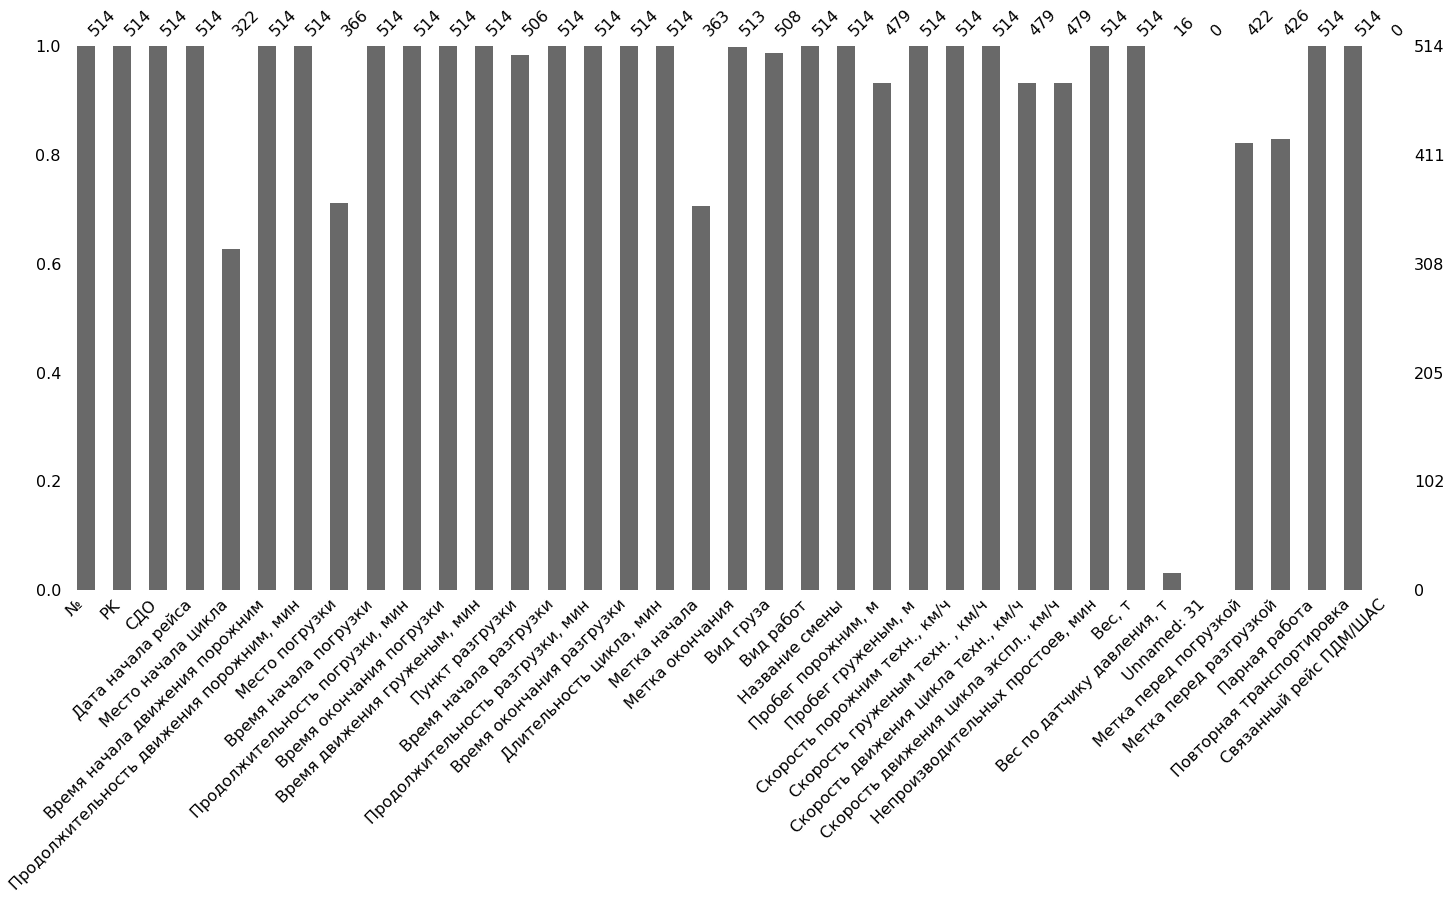

In [228]:
msno.bar(df)

In [229]:
df.describe(include=[np.number])

,СДО,"Пробег груженым, м","Скорость порожним техн., км/ч","Скорость груженым техн. , км/ч","Скорость движения цикла техн., км/ч","Скорость движения цикла экспл., км/ч","Вес, т","Вес по датчику давления, т",Unnamed: 31,Связанный рейс ПДМ/ШАС
count,514.000000,514.000000,514.000000,514.000000,479.000000,479.000000,514.000000,16.000000,0.0,0.0
mean,238.560311,149.906615,4.614786,5.297665,5.359708,4.760125,11.237354,0.750000,NaN,NaN
std,6.059907,158.877247,2.515344,2.457220,2.262821,2.392504,3.540356,0.447214,NaN,NaN
min,222.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.900000,0.000000,NaN,NaN
25%,233.000000,27.000000,3.000000,3.000000,3.600000,3.000000,8.800000,0.750000,NaN,NaN
50%,240.000000,56.500000,5.000000,5.000000,5.200000,4.600000,13.800000,1.000000,NaN,NaN
75%,244.000000,257.750000,7.000000,7.000000,7.000000,6.400000,14.100000,1.000000,NaN,NaN
max,246.000000,784.000000,11.000000,11.000000,10.900000,10.000000,14.100000,1.000000,NaN,NaN


In [ ]:
ва

Исследование выбросов веса (аномально маленьких весов)

In [49]:
data_grouped = df.groupby('СДО')
aggs = {'Вес, т': ['min', 'max', 'mean', 'median', 'std']}
stats = data_grouped.agg(aggs)
stats.columns = ['минимальный вес', 'максимальный вес', 'средний вес', 'медиана', 'среднеквадратичное отклонение']


In [51]:
stats.sort_values(by=['минимальный вес','средний вес'], ascending=True)

,минимальный вес,максимальный вес,средний вес,медиана,среднеквадратичное отклонение
СДО,,,,,
222,0.9,8.4,5.343750,6.1,2.087093
241,1.9,14.1,8.207692,8.7,3.974612
245,1.9,14.1,11.712500,14.1,4.082637
231,1.9,14.1,12.230000,14.1,3.265647
238,2.9,14.1,12.470833,14.1,3.651382
233,3.3,11.9,8.782222,9.9,2.805051
237,3.9,10.9,8.101852,8.7,1.509403
240,4.2,14.1,11.631034,14.1,4.083862
242,5.3,14.1,9.735000,9.7,2.646999


Вывод: аномально маленькие веса встречаются у 222, 241, 245, 231 машины.

Теперь построим диаграммы типа "ящик с усами".

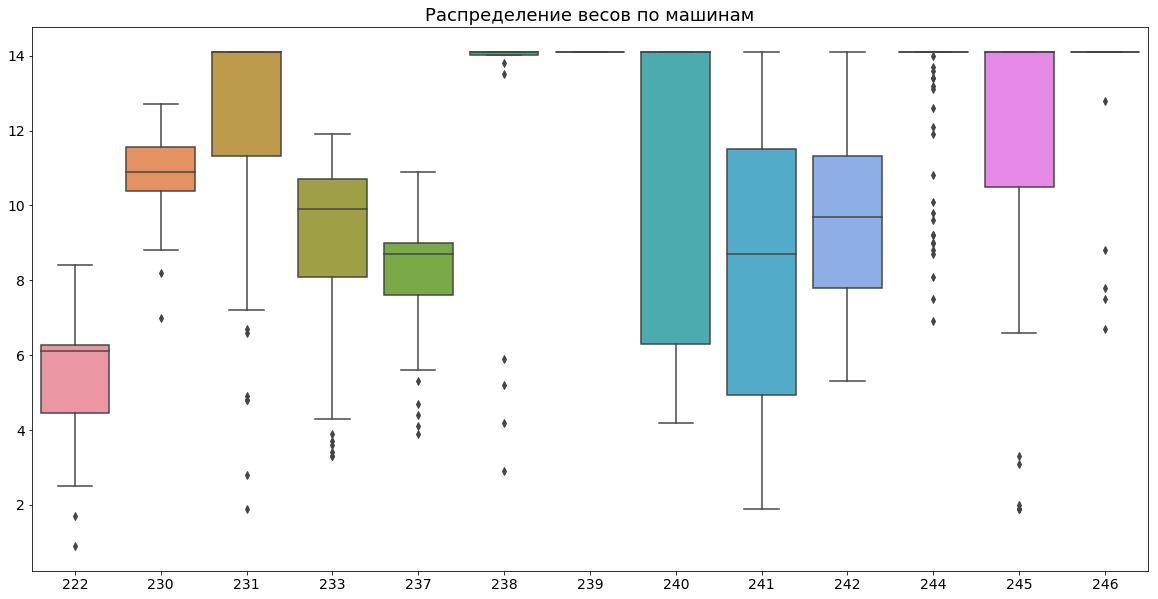

In [45]:
plt.figure(figsize=(20,10))
plt.title("Распределение весов по машинам", fontsize=18)
#plt.xticks(np.arange(0, max(df['Вес, т']+1), 5))
plt.tick_params(labelsize=14)

sns.boxplot(y='Вес, т', x="СДО", data=df).set(ylabel=None, xlabel=None)
plt.show()

Вывод: почти у всех машин наблюдаются выбросы в меньшую сторону.

Посмотрим на гистограммы выборки аномально низких весов на подозрительных машинах

Text(0.5, 1.0, 'Гистограмма для 222 машины')

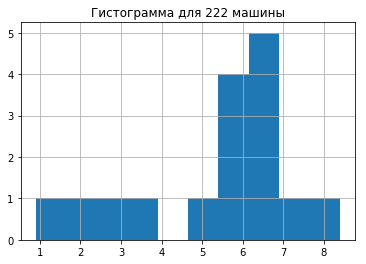

In [73]:
i = 222
df_222 = df[df['СДО'] == i]
df_222['Вес, т'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 231 машины')

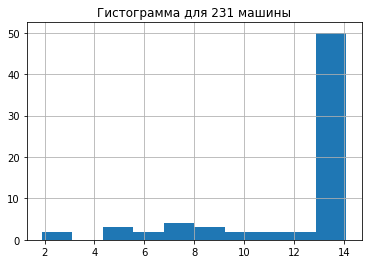

In [74]:
i = 231
df_222 = df[df['СДО'] == i]
df_222['Вес, т'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 241 машины')

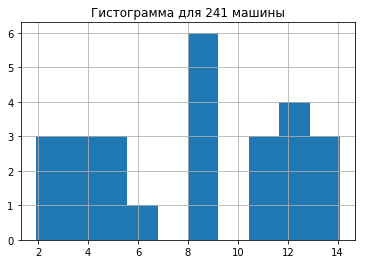

In [75]:
i = 241
df_222 = df[df['СДО'] == i]
df_222['Вес, т'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 245 машины')

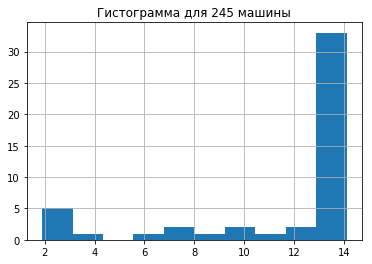

In [76]:
i = 245
df_222 = df[df['СДО'] == i]
df_222['Вес, т'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

10 перцентиль:  1.02


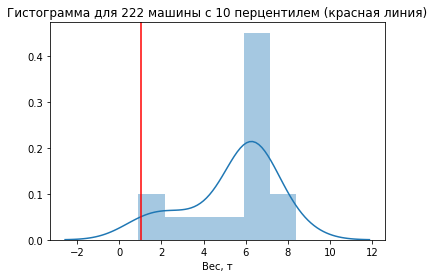

In [85]:
i = 222
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Вес, т'], 1)
sns.distplot(df_222['Вес, т'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  2.521


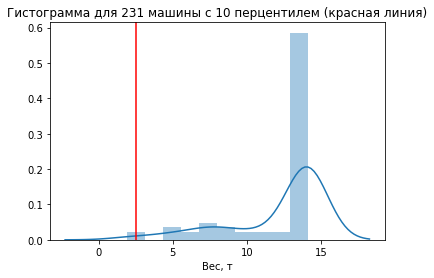

In [86]:
i = 231
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Вес, т'], 1)
sns.distplot(df_222['Вес, т'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  1.9


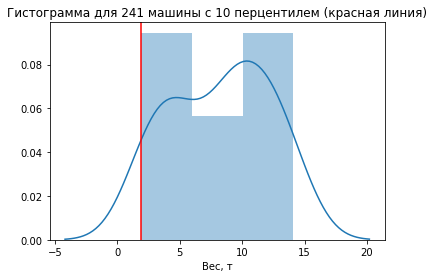

In [87]:
i = 241
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Вес, т'], 1)
sns.distplot(df_222['Вес, т'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  1.9


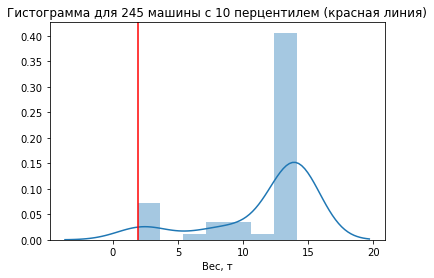

In [88]:
i = 245
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Вес, т'], 1)
sns.distplot(df_222['Вес, т'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

Исследование аномалий (1 процентиль)

In [110]:
def find_anomaly(df, column):
    level_1 = np.percentile(df[column], 1)
    anomaly = df[df[column] <= level_1]
    return anomaly,level_1

In [111]:
i = 222
print(f"Аномалии для {i} машины")

Аномалии для 222 машины


In [112]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = "Вес, т")
len(anomaly[0])

1

In [113]:
len(anomaly[0])/len(df_222)

0.0625

In [114]:
anomaly[0]

,№,PK,СДО,Дата начала рейса,Место начала цикла,Время начала движения порожним,"Продолжительность движения порожним, мин",Место погрузки,Время начала погрузки,"Продолжительность погрузки, мин",...,"Скорость движения цикла экспл., км/ч","Непроизводительных простоев, мин","Вес, т","Вес по датчику давления, т",Unnamed: 31,Метка перед погрузкой,Метка перед разгрузкой,Парная работа,Повторная транспортировка,Связанный рейс ПДМ/ШАС
765,766,1961588,222,2021-01-20 14:14:38,NaN,2021-01-20 14:14:07,0:00:10,Камера_17,2021-01-20 14:14:17,0:00:42,...,9.8,00:00:00,0.9,0.0,NaN,Камера_27 (VIST ПП:Камера_27),Камера_25,Нет,Нет,NaN


In [127]:
i = 231
print(f"Аномалии для {i} машины")

Аномалии для 231 машины


In [128]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = "Вес, т")
len(anomaly[0])

1

In [129]:
len(anomaly[0])/len(df_222)

0.014285714285714285

In [130]:
anomaly[0]

,№,PK,СДО,Дата начала рейса,Место начала цикла,Время начала движения порожним,"Продолжительность движения порожним, мин",Место погрузки,Время начала погрузки,"Продолжительность погрузки, мин",...,"Скорость движения цикла экспл., км/ч","Непроизводительных простоев, мин","Вес, т","Вес по датчику давления, т",Unnamed: 31,Метка перед погрузкой,Метка перед разгрузкой,Парная работа,Повторная транспортировка,Связанный рейс ПДМ/ШАС
498,499,1961735,231,2021-01-20 12:13:44,235/13 БИС,2021-01-20 12:12:46,0:00:42,NaN,2021-01-20 12:13:28,0:00:31,...,5.5,00:00:00,1.9,NaN,NaN,235/13 БИС_,235/13 БИС_ (VIST ПР:235/13 БИС),Нет,Нет,NaN


In [131]:
i = 241
print(f"Аномалии для {i} машины")

Аномалии для 241 машины


In [132]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = "Вес, т")
len(anomaly[0])

2

In [133]:
len(anomaly[0])/len(df_222)

0.07692307692307693

In [134]:
anomaly[0]

,№,PK,СДО,Дата начала рейса,Место начала цикла,Время начала движения порожним,"Продолжительность движения порожним, мин",Место погрузки,Время начала погрузки,"Продолжительность погрузки, мин",...,"Скорость движения цикла экспл., км/ч","Непроизводительных простоев, мин","Вес, т","Вес по датчику давления, т",Unnamed: 31,Метка перед погрузкой,Метка перед разгрузкой,Парная работа,Повторная транспортировка,Связанный рейс ПДМ/ШАС
490,491,1961348,241,2021-01-20 12:10:22,241/16 бис,2021-01-20 12:06:12,0:03:42,NaN,2021-01-20 12:09:54,0:01:28,...,1.6,0:00:35,1.9,NaN,NaN,Р-к 241/16 бис,Р-к 241/16 бис (VIST ПР:241/16 бис),Нет,Нет,NaN
633,634,1961454,241,2021-01-20 13:03:59,241/16 бис,2021-01-20 13:02:40,0:01:09,NaN,2021-01-20 13:03:49,0:00:39,...,2.0,00:00:00,1.9,NaN,NaN,205(анкер),205(анкер) (VIST ПР:205),Нет,Нет,NaN


In [139]:
i = 245
print(f"Аномалии для {i} машины")

Аномалии для 245 машины


In [140]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = "Вес, т")
len(anomaly[0])

3

In [141]:
len(anomaly[0])/len(df_222)

0.0625

In [142]:
anomaly[0]

,№,PK,СДО,Дата начала рейса,Место начала цикла,Время начала движения порожним,"Продолжительность движения порожним, мин",Место погрузки,Время начала погрузки,"Продолжительность погрузки, мин",...,"Скорость движения цикла экспл., км/ч","Непроизводительных простоев, мин","Вес, т","Вес по датчику давления, т",Unnamed: 31,Метка перед погрузкой,Метка перед разгрузкой,Парная работа,Повторная транспортировка,Связанный рейс ПДМ/ШАС
19,20,1960949,245,2021-01-20 09:29:26,204,2021-01-20 09:27:35,0:01:46,Камера_3,2021-01-20 09:29:21,0:00:11,...,2.8,00:00:00,1.9,NaN,NaN,Камера_4 (VIST ПП:Камера_4),Камера_4,Да,Нет,NaN
31,32,1960954,245,2021-01-20 09:34:54,204,2021-01-20 09:34:28,0:00:22,NaN,2021-01-20 09:34:50,0:00:08,...,4.0,00:00:00,1.9,NaN,NaN,Камера_4 (VIST ПП:Камера_4),Камера_4,Да,Нет,NaN
735,736,1961559,245,2021-01-20 13:47:56,NaN,2021-01-20 13:47:54,0:00:02,NaN,2021-01-20 13:47:56,0:00:25,...,7.9,00:00:00,1.9,NaN,NaN,Камера_24 (VIST ПП:Камера_24),Камера_24,Нет,Нет,NaN


Исследование выбросов пробега груженым

In [145]:
data_grouped = df.groupby('СДО')
aggs = {'Пробег груженым, м': ['min', 'max', 'mean', 'median', 'std']}
stats = data_grouped.agg(aggs)
stats.columns = ['минимальный пробег', 'максимальный пробег', 'средний пробег', 'медиана', 'среднеквадратичное отклонение']


In [146]:
stats.sort_values(by=['минимальный пробег','средний пробег'], ascending=True)

,минимальный пробег,максимальный пробег,средний пробег,медиана,среднеквадратичное отклонение
СДО,,,,,
237,2.0,466.0,187.129630,237.0,93.630556
244,3.0,188.0,31.690000,30.0,23.686375
246,3.0,461.0,153.540541,40.0,155.942225
238,4.0,646.0,101.541667,17.5,169.703573
242,6.0,408.0,97.400000,19.0,142.259363
245,8.0,311.0,81.125000,33.0,89.258798
239,14.0,342.0,267.920000,286.0,79.323137
241,17.0,535.0,81.384615,27.5,132.118758
231,20.0,476.0,112.771429,43.0,135.636147


Вывод: аномально маленькие пробеги встречаются у 237, 244, 246, 238, 242, 245 машины.

Теперь построим диаграммы типа "ящик с усами".

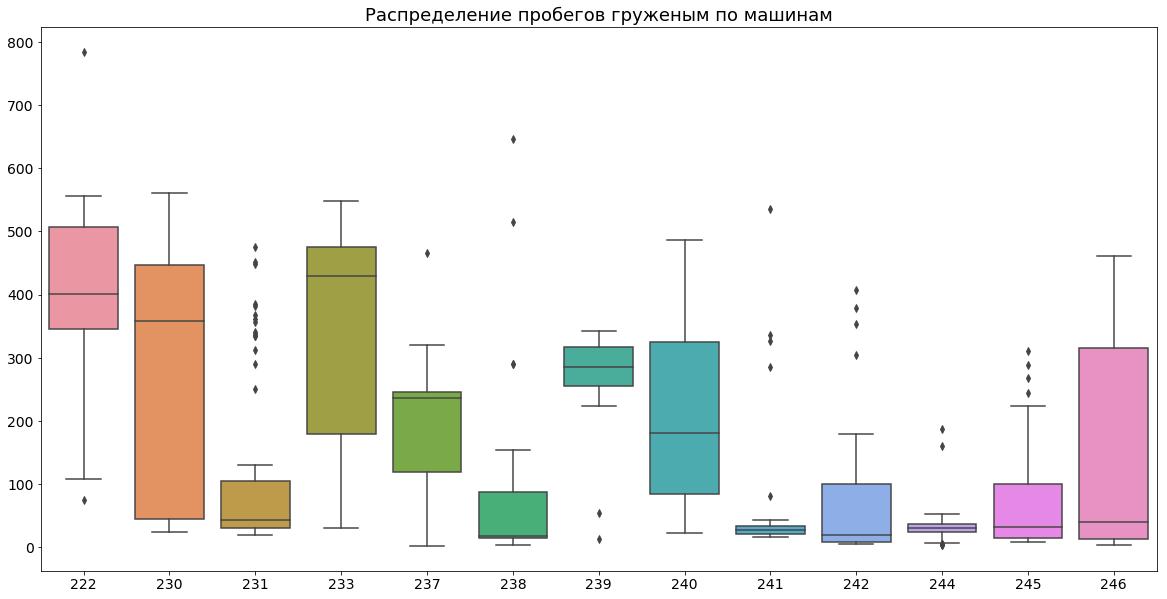

In [148]:
plt.figure(figsize=(20,10))
plt.title("Распределение пробегов груженым по машинам", fontsize=18)
#plt.xticks(np.arange(0, max(df['Вес, т']+1), 5))
plt.tick_params(labelsize=14)

sns.boxplot(y='Пробег груженым, м', x="СДО", data=df).set(ylabel=None, xlabel=None)
plt.show()

Посмотрим на гистограммы выборки аномально низких пробегов на подозрительных машинах

Text(0.5, 1.0, 'Гистограмма для 237 машины')

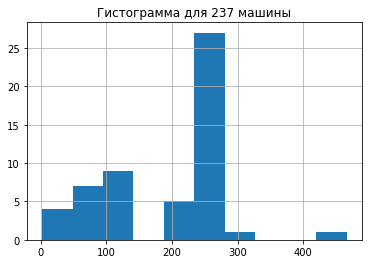

In [153]:
#237, 244, 246, 238, 242, 245
i = 237
df_222 = df[df['СДО'] == i]
df_222['Пробег груженым, м'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 246 машины')

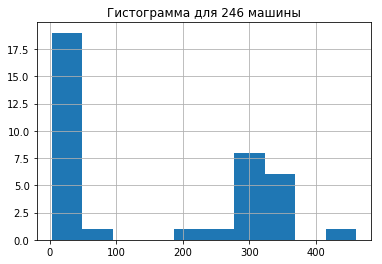

In [154]:
i = 246
df_222 = df[df['СДО'] == i]
df_222['Пробег груженым, м'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 238 машины')

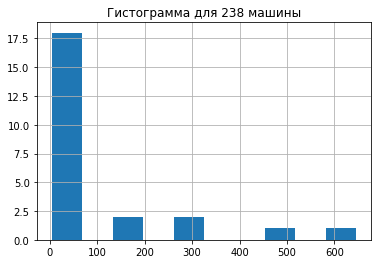

In [155]:
i = 238
df_222 = df[df['СДО'] == i]
df_222['Пробег груженым, м'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 245 машины')

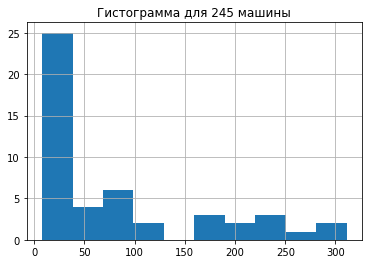

In [157]:
i = 245
df_222 = df[df['СДО'] == i]
df_222['Пробег груженым, м'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

Text(0.5, 1.0, 'Гистограмма для 242 машины')

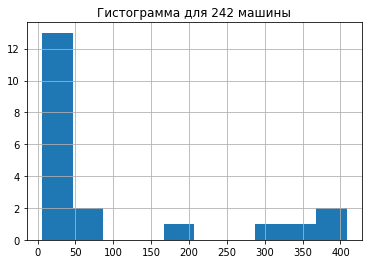

In [158]:
i = 242
df_222 = df[df['СДО'] == i]
df_222['Пробег груженым, м'].hist(bins = 10)
plt.title(f"Гистограмма для {i} машины")

10 перцентиль:  3.5900000000000003


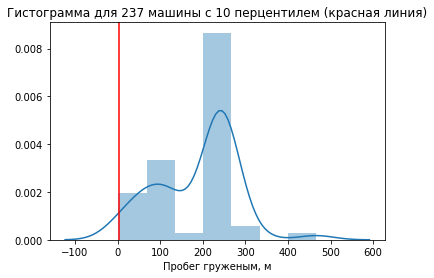

In [161]:
#237, 244, 246, 238, 242, 245
i = 237
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  3.0


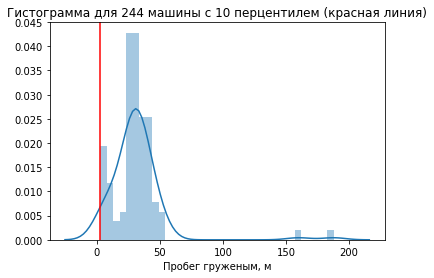

In [163]:
#237, 244, 246, 238, 242, 245
i = 244
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  3.7199999999999998


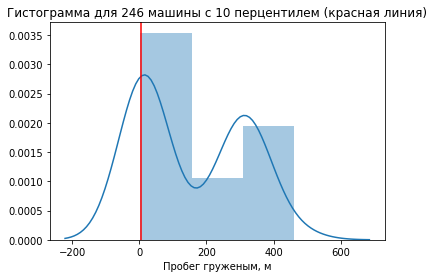

In [164]:
#237, 244, 246, 238, 242, 245
i = 246
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  4.69


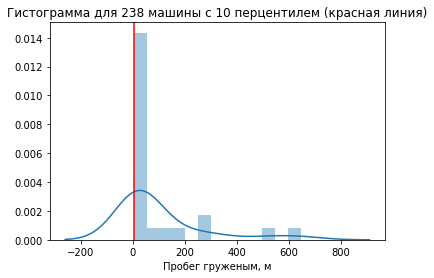

In [165]:
#237, 244, 246, 238, 242, 245
i = 238
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  6.0


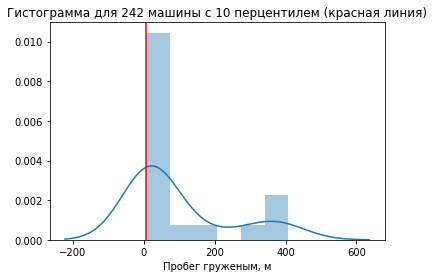

In [166]:
#237, 244, 246, 238, 242, 245
i = 242
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

10 перцентиль:  8.47


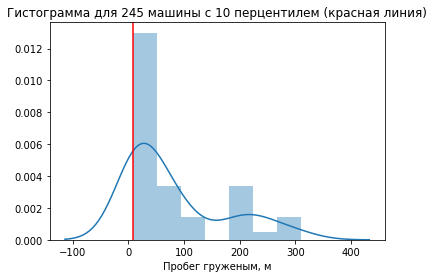

In [167]:
#237, 244, 246, 238, 242, 245
i = 245
df_222 = df[df['СДО'] == i]
level_10 = np.percentile(df_222['Пробег груженым, м'], 1)
sns.distplot(df_222['Пробег груженым, м'])
plt.axvline(x=level_10, color="r", linestyle="-")
plt.title(f"Гистограмма для {i} машины с 10 перцентилем (красная линия)")
print("10 перцентиль: ", level_10)

Исследование аномалий (1 процентиль)

In [188]:
#237, 244, 246, 238, 242, 245
i = 237
print(f"Аномалии для {i} машины")

Аномалии для 237 машины


In [189]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

1

In [190]:
len(anomaly[0])/len(df_222)

0.018518518518518517

In [191]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
143,237,2.0


In [184]:
#237, 244, 246, 238, 242, 245
i = 244
print(f"Аномалии для {i} машины")

Аномалии для 244 машины


In [185]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

2

In [186]:
len(anomaly[0])/len(df_222)

0.02

In [187]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
457,244,3.0
838,244,3.0


In [192]:
#237, 244, 246, 238, 242, 245
i = 246
print(f"Аномалии для {i} машины")

Аномалии для 246 машины


In [193]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

1

In [194]:
len(anomaly[0])/len(df_222)

0.02702702702702703

In [195]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
138,246,3.0


In [196]:
#237, 244, 246, 238, 242, 245
i = 238
print(f"Аномалии для {i} машины")

Аномалии для 238 машины


In [197]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

1

In [198]:
len(anomaly[0])/len(df_222)

0.041666666666666664

In [199]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
1004,238,4.0


In [200]:
#237, 244, 246, 238, 242, 245
i = 242
print(f"Аномалии для {i} машины")

Аномалии для 242 машины


In [201]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

2

In [202]:
len(anomaly[0])/len(df_222)

0.1

In [203]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
757,242,6.0
762,242,6.0


In [204]:
#237, 244, 246, 238, 242, 245
i = 245
print(f"Аномалии для {i} машины")

Аномалии для 245 машины


In [205]:
df_222 = df[df['СДО'] == i]
anomaly = find_anomaly(df=df_222, column = 'Пробег груженым, м')
len(anomaly[0])

1

In [206]:
len(anomaly[0])/len(df_222)

0.020833333333333332

In [207]:
anomaly[0][['СДО','Пробег груженым, м']]

,СДО,"Пробег груженым, м"
1015,245,8.0


In [208]:
df.columns

Index(['№', 'PK', 'СДО', 'Дата начала рейса', 'Место начала цикла',
       'Время начала движения порожним',
       'Продолжительность движения порожним, мин', 'Место погрузки',
       'Время начала погрузки', 'Продолжительность погрузки, мин',
       'Время окончания погрузки', 'Время движения груженым, мин',
       'Пункт разгрузки', 'Время начала разгрузки',
       'Продолжительность разгрузки, мин', 'Время окончания разгрузки',
       'Длительность цикла, мин', 'Метка начала', 'Метка окончания',
       'Вид груза', 'Вид работ', 'Название смены', 'Пробег порожним, м',
       'Пробег груженым, м', 'Скорость порожним техн., км/ч',
       'Скорость груженым техн. , км/ч', 'Скорость движения цикла техн., км/ч',
       'Скорость движения цикла экспл., км/ч',
       'Непроизводительных простоев, мин', 'Вес, т',
       'Вес по датчику давления, т', 'Unnamed: 31', 'Метка перед погрузкой',
       'Метка перед разгрузкой', 'Парная работа', 'Повторная транспортировка',
       'Связанный рейс П

In [233]:
#поиск пропущенных значений 
df2 = df[df['Пробег порожним, м'].isna()]
len(df2['Пробег порожним, м'])

35

Исследование пропусков пробега порожним

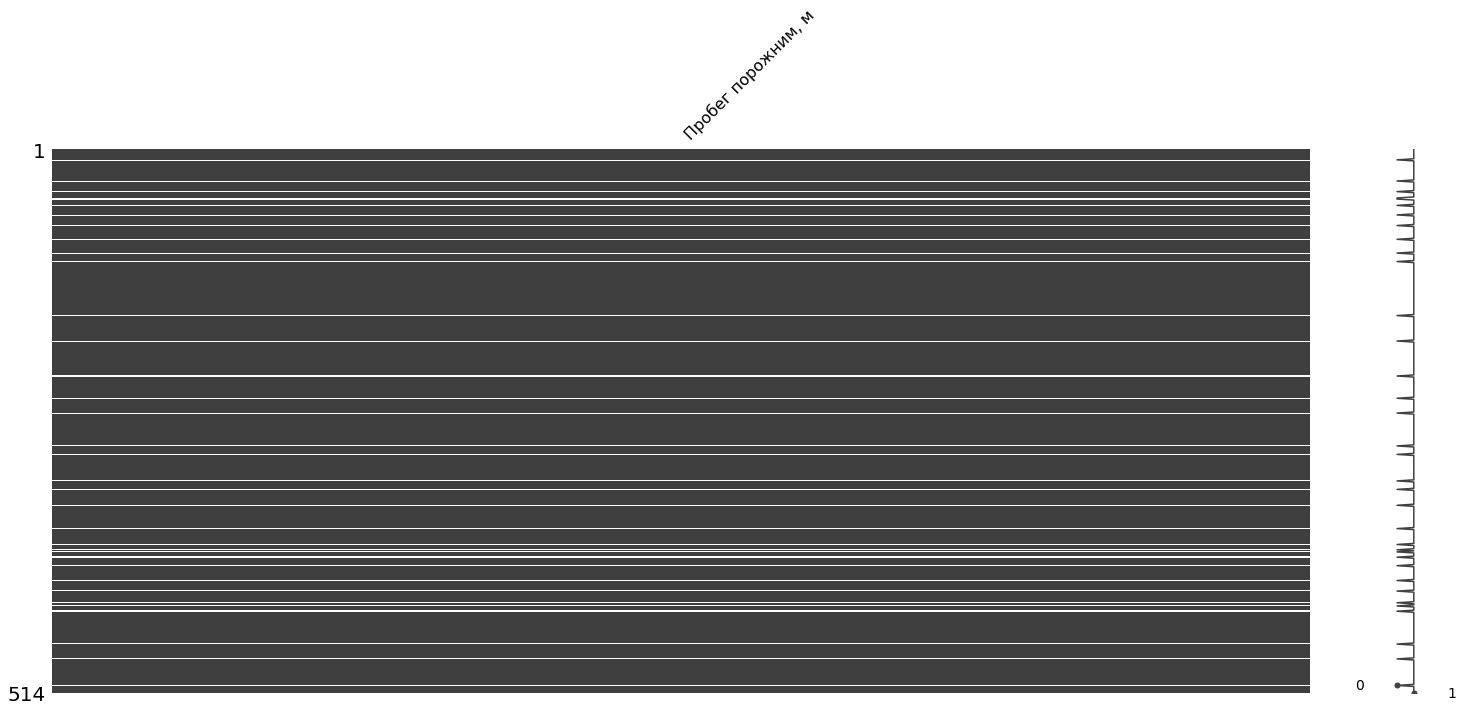

In [234]:
msno.matrix(df[['Пробег порожним, м']])

In [236]:
train = df[~df['Пробег порожним, м'].isna()]

In [238]:
train['float_dist'] = train['Пробег порожним, м'].apply(lambda x: float(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Исследование выбросов пробега груженым

In [239]:
data_grouped = train.groupby('СДО')
aggs = {'float_dist': ['min', 'max', 'mean', 'median', 'std']}
stats = data_grouped.agg(aggs)
stats.columns = ['минимальный пробег', 'максимальный пробег', 'средний пробег', 'медиана', 'среднеквадратичное отклонение']


In [240]:
stats.sort_values(by=['минимальный пробег','средний пробег'], ascending=True)

,минимальный пробег,максимальный пробег,средний пробег,медиана,среднеквадратичное отклонение
СДО,,,,,
238,1.0,263.0,26.200000,13.5,56.540251
240,1.0,110.0,27.760000,10.0,36.933815
244,1.0,492.0,28.131868,20.0,51.025965
239,1.0,398.0,52.086957,6.0,110.561342
245,1.0,449.0,73.361702,26.0,103.368153
246,1.0,998.0,165.096774,69.0,208.086898
242,1.0,693.0,330.315789,357.0,215.094050
233,2.0,367.0,32.954545,27.0,55.660915
231,2.0,445.0,54.637681,31.0,74.658629


Вывод: аномально маленькие пробеги встречаются у всех машины.

Теперь построим диаграммы типа "ящик с усами".

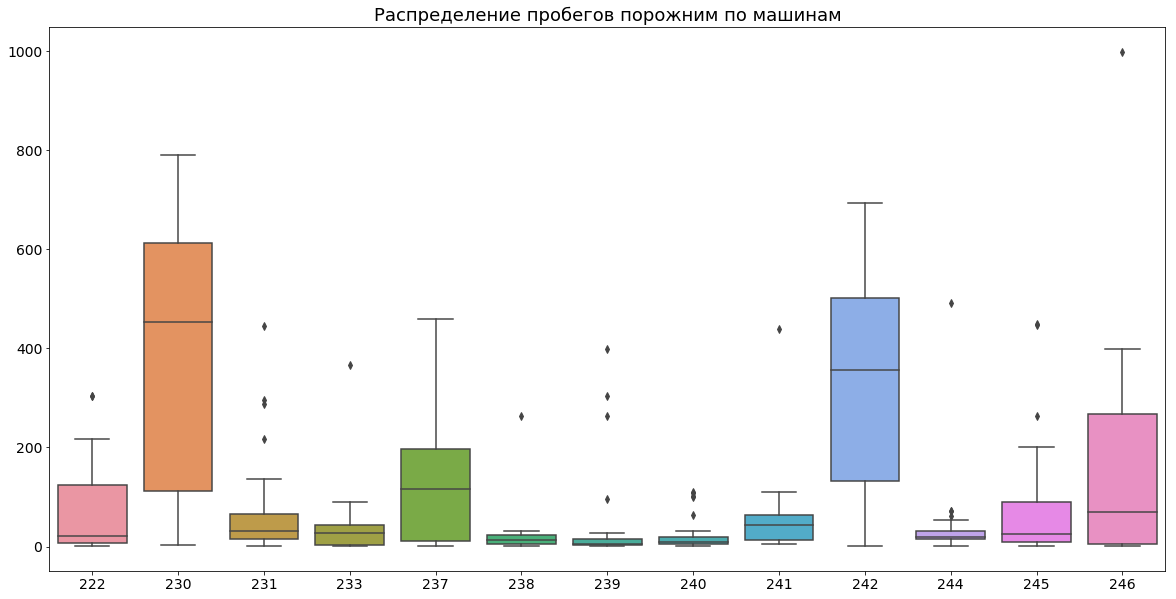

In [242]:
plt.figure(figsize=(20,10))
plt.title("Распределение пробегов порожним по машинам", fontsize=18)
#plt.xticks(np.arange(0, max(df['Вес, т']+1), 5))
plt.tick_params(labelsize=14)

sns.boxplot(y='float_dist', x="СДО", data=train).set(ylabel=None, xlabel=None)
plt.show()

Вывод: очень маленький пробег порожним. Теперь выбросы в бОльшую сторону. 

Общий вывод: присутствуют аномалии в весах и пробегах. Возможно, измерители весов и расстояний не всегда корретно работают.